# Starting

In [111]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [112]:
dataset = pd.read_csv('all_stocks_5yr.csv')

In [178]:
dataset.head()

date   open   high    low  close    volume
0 2013-02-08  15.07  15.12  14.63  14.75   8407500
1 2013-02-11  14.89  15.01  14.26  14.46   8882000
2 2013-02-12  14.45  14.51  14.10  14.27   8126000
3 2013-02-13  14.30  14.94  14.25  14.66  10259500
4 2013-02-14  14.94  14.96  13.16  13.99  31879900

# to drop unnecessary columns

In [137]:
dataset['date']= pd.to_datetime(dataset.date)

In [177]:
print(dataset.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [179]:
# dataset.drop('Name',axis=1,inplace=True)

In [180]:
dataset.shape

(619029, 6)

In [181]:
dataset.dropna(inplace=True)


In [182]:
dataset.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [145]:
dataset.isna().any()

date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 33.1 MB


In [147]:
dataset.describe()

date           open           high  \
count                      619029  619029.000000  619029.000000   
mean   2015-08-18 00:45:31.033280      83.023334      83.778419   
min           2013-02-08 00:00:00       1.620000       1.690000   
25%           2014-05-20 00:00:00      40.220000      40.620000   
50%           2015-08-21 00:00:00      62.590000      63.150000   
75%           2016-11-15 00:00:00      94.370000      95.180000   
max           2018-02-07 00:00:00    2044.000000    2067.990000   
std                           NaN      97.378769      98.207735   

                 low          close        volume  
count  619029.000000  619029.000000  6.190290e+05  
mean       82.256200      83.043305  4.321892e+06  
min         1.500000       1.590000  1.010000e+02  
25%        39.830000      40.240800  1.070351e+06  
50%        62.020000      62.620000  2.082165e+06  
75%        93.540000      94.410000  4.284550e+06  
max      2035.110000    2049.000000  6.182376e+08  
std        96.507634      97.388913  8.693671e+06

In [148]:
print(len(dataset))

619029


<Axes: >

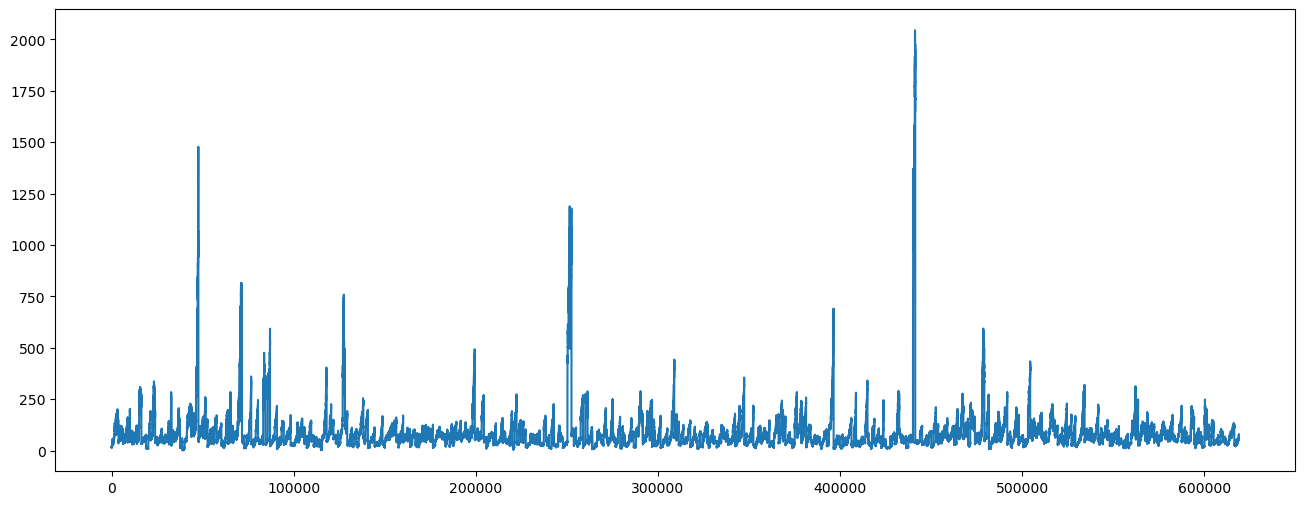

In [149]:
dataset['open'].plot(figsize=(16,6))

In [150]:
x= dataset[['open','high','low','volume']]
y= dataset['close']

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)

In [152]:
x_train.shape

(464271, 4)

In [153]:
x_test.shape

(154758, 4)

In [154]:
x_train.isnull().sum()

open      0
high      0
low       0
volume    0
dtype: int64

In [155]:
y_train.isnull().sum()

0

In [156]:
y_train.shape

(464271,)

In [157]:
dataset.dropna(inplace=True)


In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor = LinearRegression()

In [159]:
regressor.fit(x_train,y_train)

LinearRegression()

In [160]:
print(regressor.coef_)

[-5.59296668e-01  7.88040082e-01  7.71543888e-01  3.12641024e-11]


In [161]:
print(regressor.intercept_)

-0.007208102417379791


In [162]:
predicted= regressor.predict(x_test)

In [163]:
print(x_test)

            open      high       low    volume
367069   48.1800   48.6100   47.8400   2298305
616460  113.4100  113.6600  112.6400    830341
296046  193.5600  193.5600  190.0000    819859
553040   81.0500   81.9300   80.5800   6439703
96249    73.7000   74.0100   71.7240   3758359
...          ...       ...       ...       ...
429918   74.2100   75.5900   73.4800   1836388
408023   62.8428   63.4285   61.9557  12990789
532200   68.7500   70.6600   68.4100   1966483
96986    67.0100   67.2800   65.9501   1878688
296758  231.9900  232.9000  225.7960   1471838

[154758 rows x 4 columns]


In [164]:
predicted.shape

(154758,)

In [165]:
dframe = pd.DataFrame(y_test,predicted)

In [166]:
dfr = pd.DataFrame({'actual':y_test,'Predicted':predicted})

In [167]:
print(dfr)

          actual   Predicted
367069   48.3800   48.263238
616460  113.3900  113.038322
296046  190.2350  190.861731
553040   81.3900   81.397129
96249    73.2300   72.433805
...          ...         ...
429918   75.5400   74.748438
408023   63.0092   62.631171
532200   69.9600   70.005437
96986    66.2600   66.417114
296758  228.1700  227.987663

[154758 rows x 2 columns]


In [168]:
 dfr.head(10)

actual   Predicted
367069   48.380   48.263238
616460  113.390  113.038322
296046  190.235  190.861731
553040   81.390   81.397129
96249    73.230   72.433805
339170   48.220   48.332868
178157   55.430   55.623801
617613   42.340   42.143114
589539   81.150   80.153324
540711   91.680   91.636939

In [169]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [170]:
regressor.score(x_test,y_test)

0.9999513989769861

In [171]:
import math

In [172]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error 0.3382031219088533


In [173]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error 0.4680496356279965


In [174]:
graph= dfr.head(20)

<Axes: >

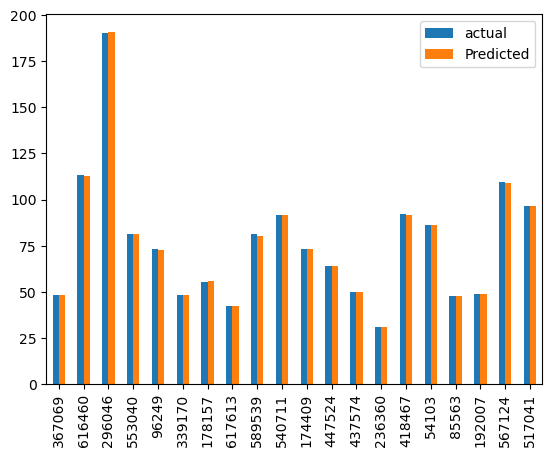

In [175]:
graph.plot(kind= 'bar')